In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import sys, os

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import custom_plot_objects as cpo

import ModelFramework as mf
import ModelFramework.Elements as ele
import ModelFramework.ExternalForces as ef
import FwtModels.RectWing as rw
import FwtModels.RollRig as RollRig

from matplotlib.lines import Line2D

me.mechanics_printing()

In [2]:
half = sym.Rational(1,2)

p = mf.ModelParameters.DynamicModel(1)
p.r = mf.ModelSymbol(value =22,string='r')
p.d = mf.ModelSymbol(value =1.86,string='d')


In [3]:
frame = mf.HomogenousTransform().R_z(p.q[0]).Translate(p.r,0,0).R_z(sym.pi/2).Translate(p.d,0,0)

In [24]:
def get_alpha_beta(frame,p,s):
    v = sym.simplify(frame.BodyVelocity().subs(s))
    alpha = sym.simplify(-v[2]/v[0])
    beta = sym.simplify(-v[1]/v[0])
    return alpha,beta

# Fixed AoA = 0

In [25]:
p = mf.ModelParameters.DynamicModel(2)
p.r = mf.ModelSymbol(value =22,string='r')
p.d = mf.ModelSymbol(value =1.86,string='d')

In [26]:
frame = mf.HomogenousTransform().R_z(p.q[0]).R_x(p.q[1]).Translate(p.d,0,-p.r)
alpha,beta = get_alpha_beta(frame,p,{qd:0 for qd in p.qd[1:]})
alpha

In [27]:
beta

# Non-Zero AoA

In [28]:
p = mf.ModelParameters.DynamicModel(3)
p.r = mf.ModelSymbol(value =22,string='r')
p.d = mf.ModelSymbol(value =1.86,string='d')

In [29]:
frame = mf.HomogenousTransform().R_z(p.q[0]).R_x(p.q[1]).Translate(0,0,-p.r).R_y(p.q[2]).Translate(p.d,0,0)
alpha,beta = get_alpha_beta(frame,p,{qd:0 for qd in p.qd[1:]})
alpha

In [30]:
beta

# Non Zero Beta and Alpha

In [31]:
p = mf.ModelParameters.DynamicModel(4)
p.r = mf.ModelSymbol(value =22,string='r')
p.d = mf.ModelSymbol(value =1.86,string='d')

In [32]:
frame = mf.HomogenousTransform().R_z(p.q[0]).R_x(p.q[1]).Translate(0,0,-p.r).R_y(p.q[2]).R_z(p.q[3]).Translate(p.d,0,0)
alpha,beta = get_alpha_beta(frame,p,{qd:0 for qd in p.qd[1:]})
alpha

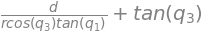

In [34]:
beta